In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (2).csv


In [ ]:
tot=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
tot

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,ÿTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#eda
tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
toc=pd.concat([tot.iloc[:,2:4],tot.iloc[:,6:7],tot.iloc[:,8:9],tot.iloc[:,12:14],tot.iloc[:,15:18]],axis=1)
toc

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
tor=toc.rename({'Age_08_04':'age','cc':'CC'	,'Quarterly_Tax':'QT'},axis=1)


In [ ]:
tor

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
tor[tor.duplicated()]

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyc=tor.drop_duplicates().reset_index(drop=True)
toyc

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyc.describe()

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [ ]:
toyc.corr()

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


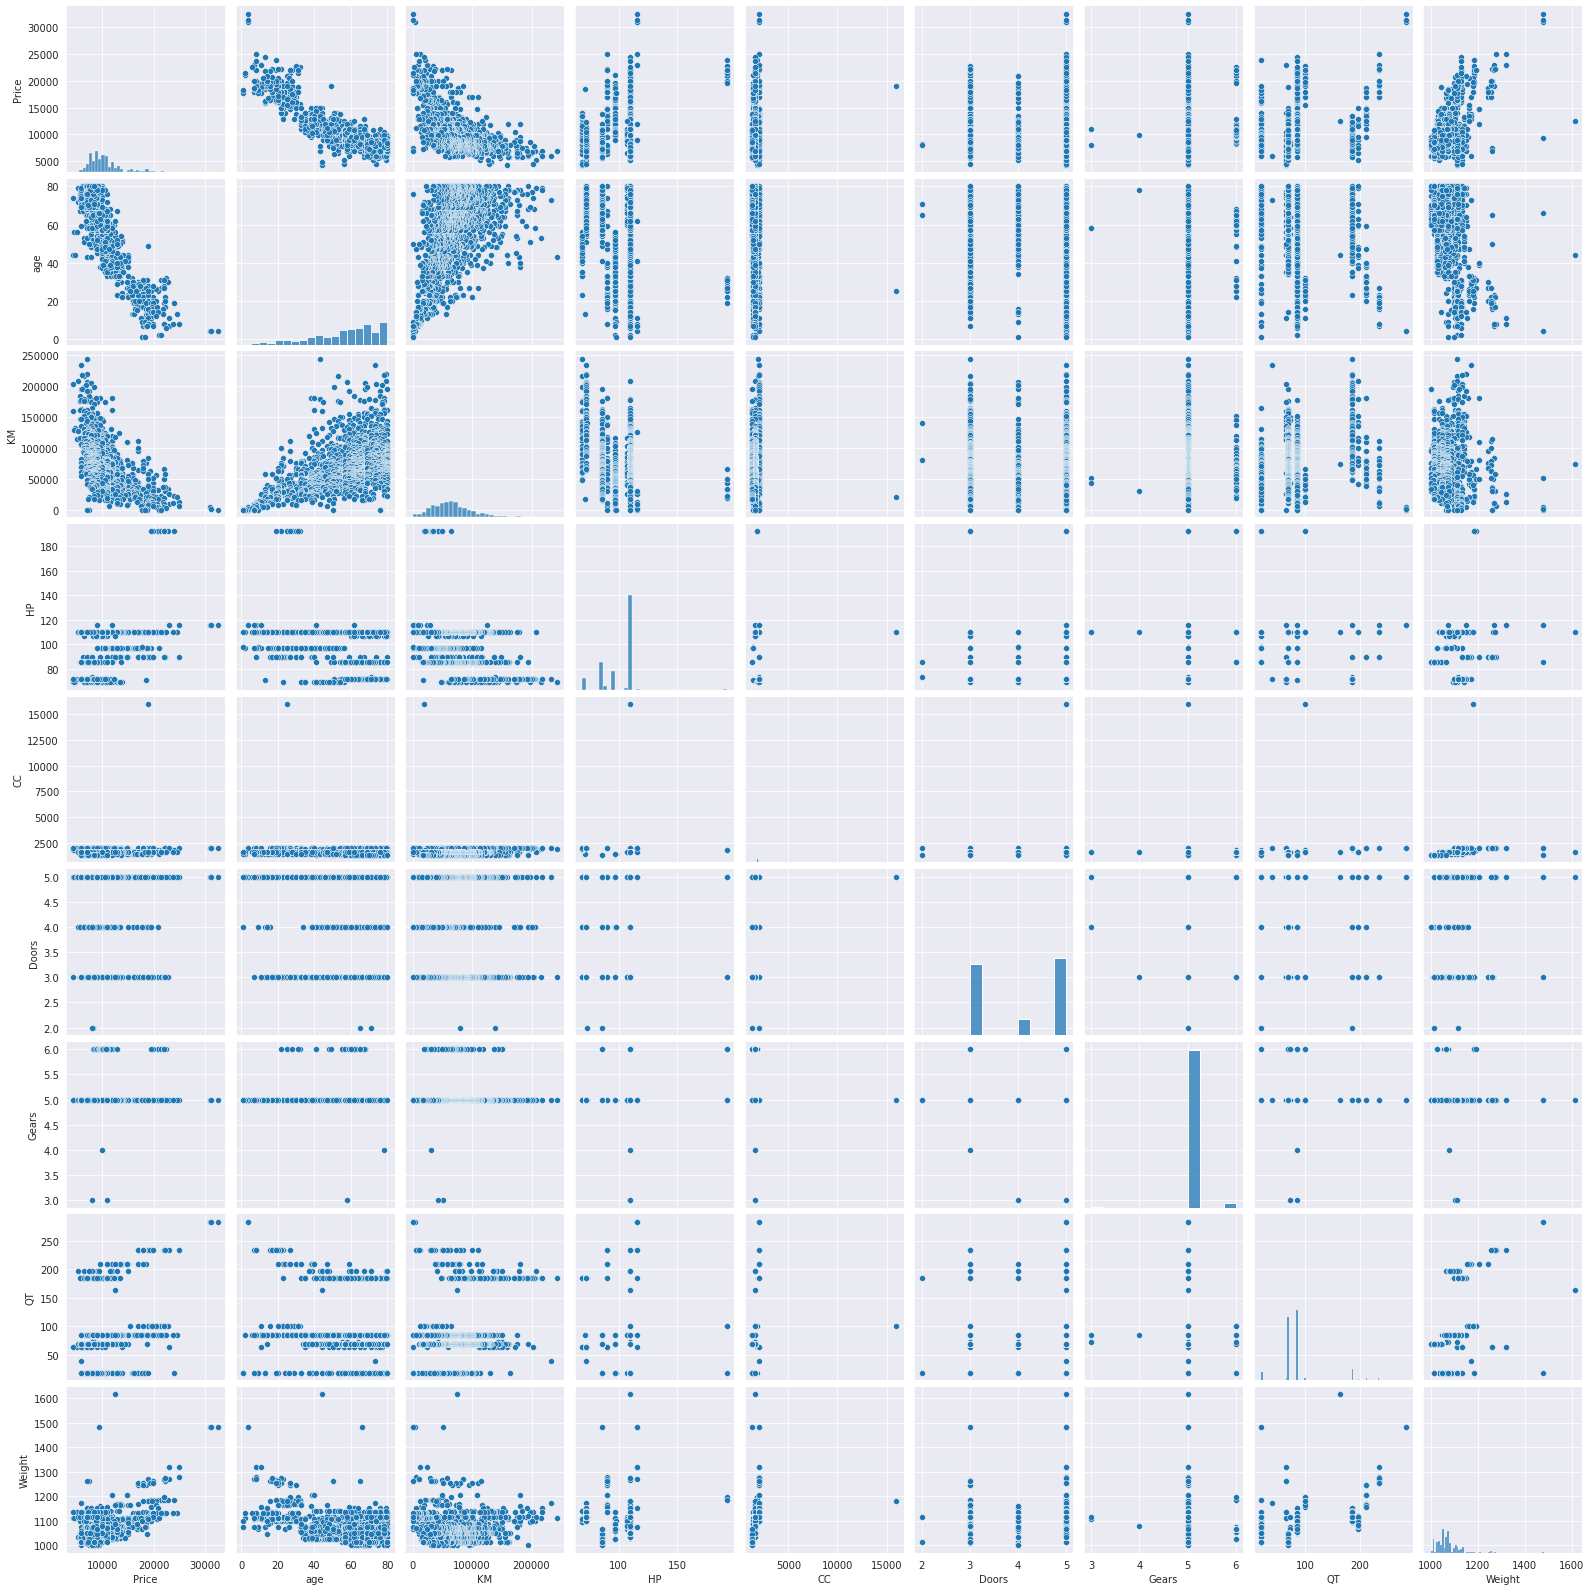

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toyc)

In [ ]:
model=smf.ols('Price~age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyc).fit()
model

In [ ]:
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64, Intercept    0.00011
 age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [ ]:
# looking at the t values we can say that CC and Doors are insignificant independent variables
'''insignificant independent variables are those variables whose value is close to zero and also it may not contribute much for 
estimating the response variable.'''


'insignificant independent variables are those variables whose value is close to zero and also it may not contribute much for \nestimating the response variable.'

In [ ]:
model.rsquared 

0.8625200256947001

In [ ]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [ ]:
slr_c=smf.ols('Price~CC',data=toyc).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue


(Intercept    24.879592
 CC            4.745039
 dtype: float64, Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [ ]:
slr_c=smf.ols('Price~Doors',data=toyc).fit()
slr_c.tvalues , slr_c.pvalues # Doors has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [ ]:
slr_c=smf.ols('Price~CC+Doors',data=toyc).fit()
slr_c.tvalues , slr_c.pvalues # CC  and doors has significant pvalue i.e., p value lessthan 0.05) 

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [ ]:
#model validation techniques
#vif(collinearity check)

In [ ]:

rsq_age=smf.ols('age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyc).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~age+HP+CC+Doors+Gears+QT+Weight',data=toyc).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~age+KM+CC+Doors+Gears+QT+Weight',data=toyc).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~age+KM+HP+Doors+Gears+QT+Weight',data=toyc).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~age+KM+HP+CC+Gears+QT+Weight',data=toyc).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~age+KM+HP+CC+Doors+QT+Weight',data=toyc).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~age+KM+HP+CC+Doors+Gears+Weight',data=toyc).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~age+KM+HP+CC+Doors+Gears+QT',data=toyc).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [ ]:
d1={'Variables':['age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df
#vif=1indicates no correlation b/w independent variables
#vif>5 or >10 indicates high multi collinearity b/w the indeependent variables and others
# If any variable has a vif>10 , then dropping that variable can deal with the multi_collinearity.

,Variables,Vif
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [ ]:
#none of the variables has vif>3...so no collinearity b/w them 
#so consider all varaibles in Regression equation

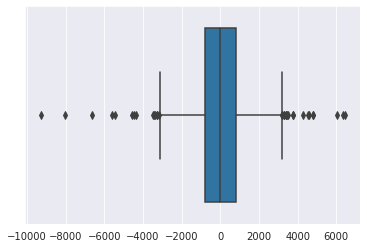

In [ ]:
#checking normality of errors
sns.boxplot(model.resid)

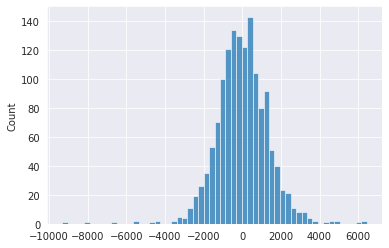

In [ ]:
sns.histplot(model.resid)

In [ ]:
def get_standardized_values(vals) : return (vals-vals.mean())/vals.std()

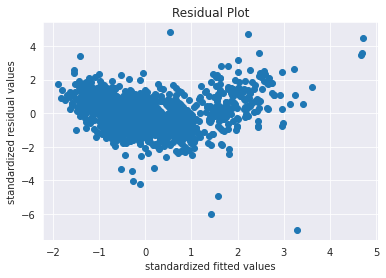

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


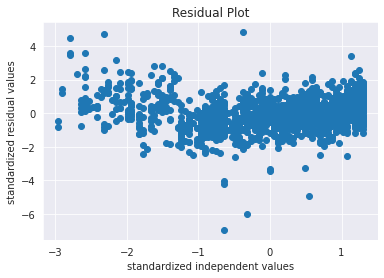

In [ ]:
#residuals vs regressors
plt.scatter(get_standardized_values(toyc['age']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

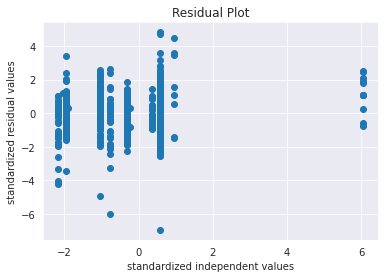

In [ ]:
plt.scatter(get_standardized_values(toyc['HP']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

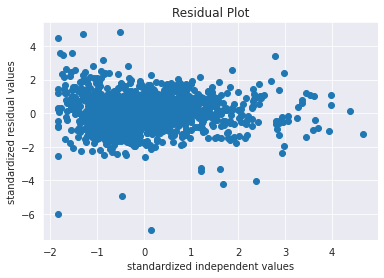

In [ ]:
plt.scatter(get_standardized_values(toyc['KM']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

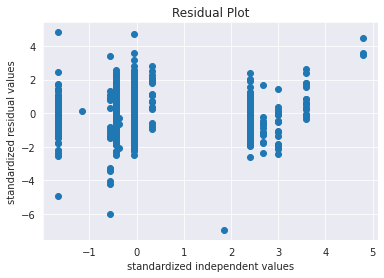

In [ ]:
plt.scatter(get_standardized_values(toyc['QT']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

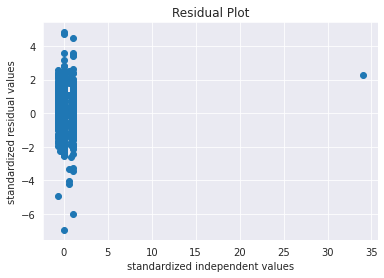

In [ ]:
plt.scatter(get_standardized_values(toyc['CC']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

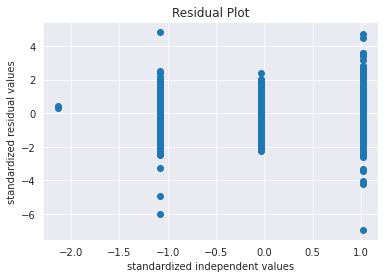

In [ ]:
plt.scatter(get_standardized_values(toyc['Doors']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

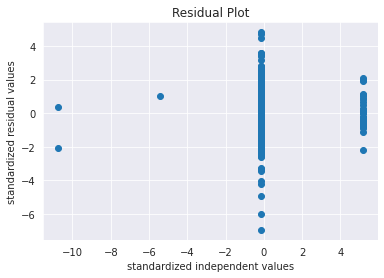

In [ ]:
plt.scatter(get_standardized_values(toyc['Gears']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

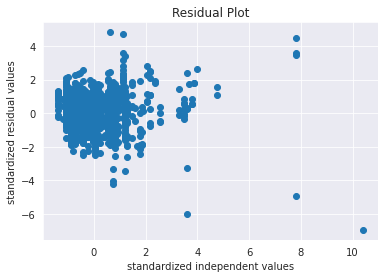

In [ ]:
plt.scatter(get_standardized_values(toyc['Weight']),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized independent values')
plt.ylabel('standardized residual values')
plt.show() 

In [ ]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

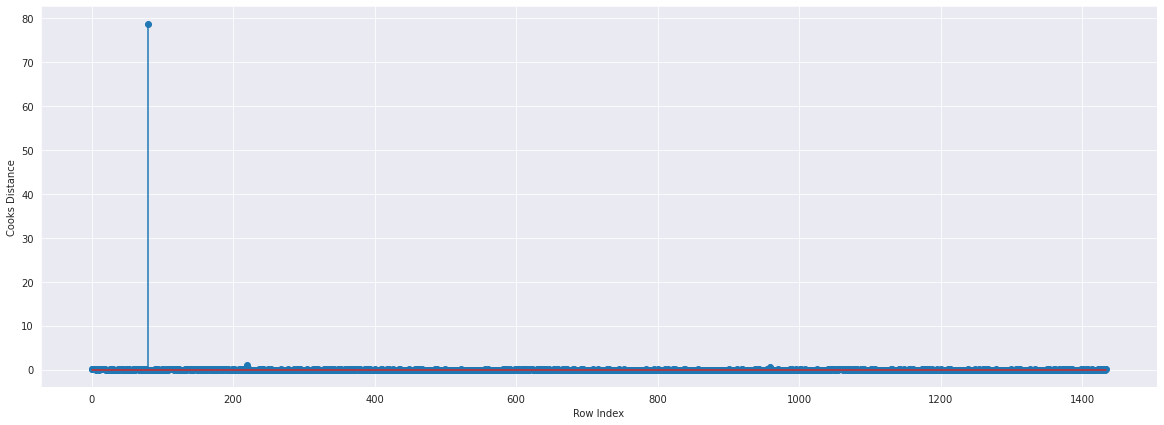

In [ ]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyc)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [ ]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)


(80, 78.72950582258927)

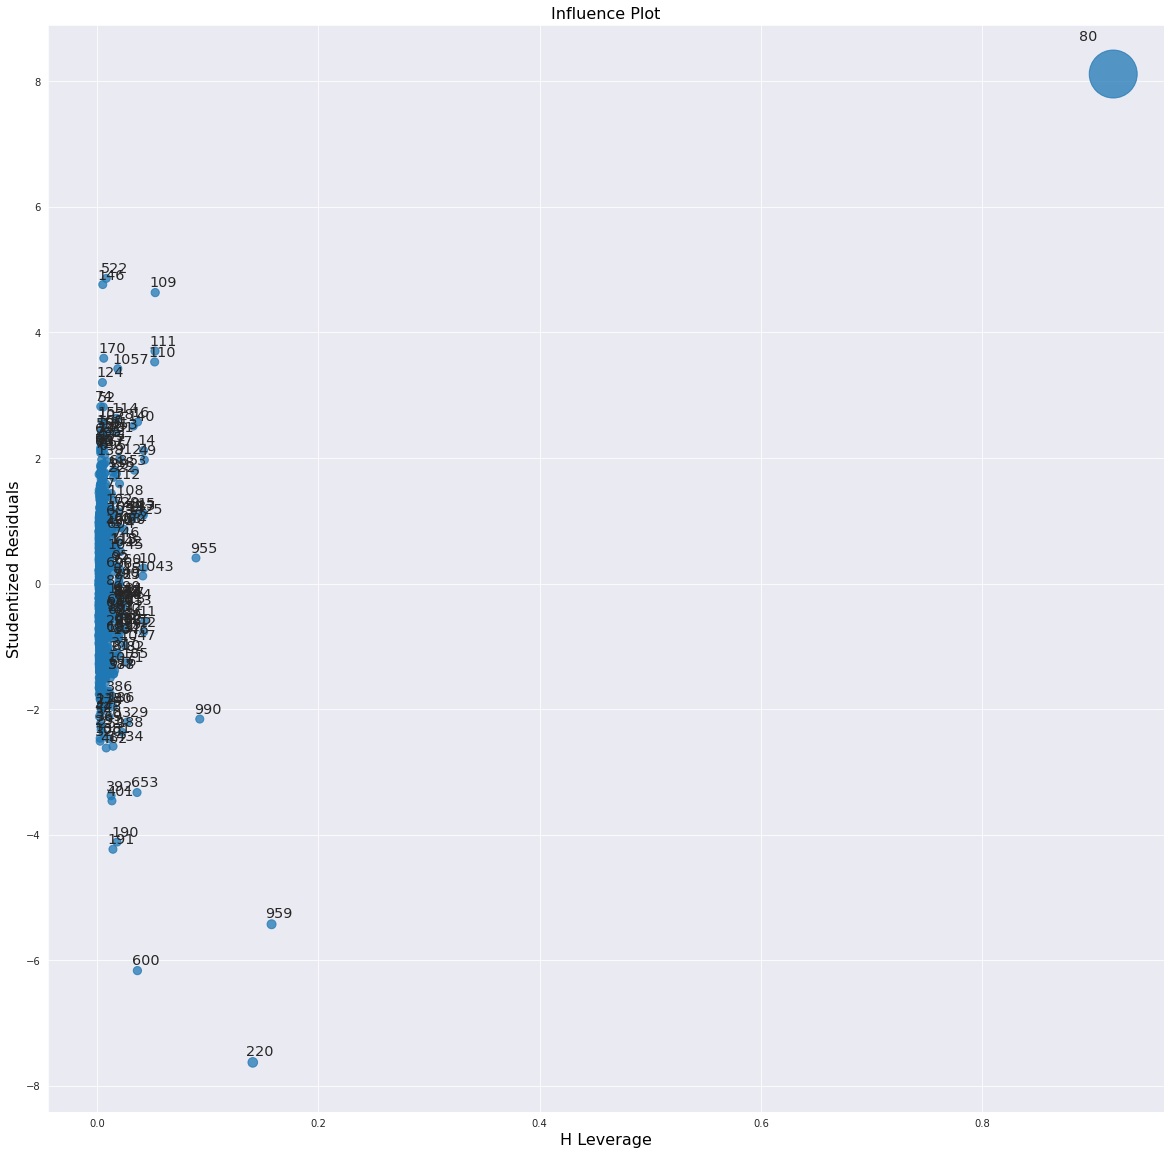

In [ ]:
 #2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [ ]:
k=toyc.shape[1]
n=toyc.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [ ]:
toyc[toyc.index.isin([80])] 

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
#Improving the Model
# Creating a copy of data so that original dataset is not affected
toyc_new=toyc.copy()
toyc_new

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toycc=toyc_new.drop(toyc_new.index[[80]],axis=0).reset_index(drop=True)
toycc

,Price,age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#Model Deletion Diagnostics and Final Model
while np.max(c)>0.5 :
    model=smf.ols('Price~age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycc).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toycc=toycc.drop(toycc.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toycc
else:
    final_model=smf.ols('Price~age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycc).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171205


In [ ]:
#or
if np.max(c)>0.5:
    model=smf.ols('Price~age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycc).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toycc.drop(toycc.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycc).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171205


In [ ]:
final_model.rsquared

0.8882395145171205

In [ ]:
#model predictions

# say New data for prediction is
new_data=pd.DataFrame({'age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [ ]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [ ]:
# Automatic Prediction of Price 
toycc['pred_y']=final_model.predict(toycc)
toycc


,Price,age,KM,HP,CC,Doors,Gears,QT,Weight,pred_y
0,13500,23,46986,90,2000,3,5,210,1165,16345.352610
1,13750,23,72937,90,2000,3,5,210,1165,15886.635544
2,13950,24,41711,90,2000,3,5,210,1165,16328.224968
3,14950,26,48000,90,2000,3,5,210,1165,15996.318854
4,13750,30,38500,90,2000,3,5,210,1170,15883.424182
...,...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025,9161.230587
1427,10845,72,19000,86,1300,3,5,69,1015,8536.091326
1428,8500,71,17016,86,1300,3,5,69,1015,8681.531063
1429,7250,70,16916,86,1300,3,5,69,1015,8793.668694
